In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/Final Project/classification_data.csv")
df.head(2)

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01


In [4]:
df['channelGrouping'].unique()

array(['(Other)', 'Paid Search', 'Display'], dtype=object)

In [5]:

print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

## EDA VISUALIZE

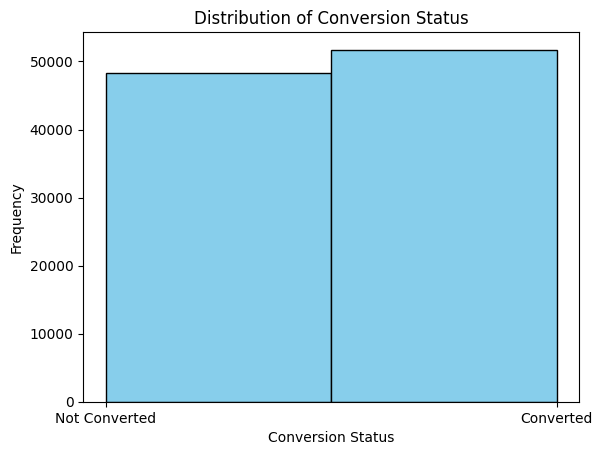

In [6]:

# distribution
plt.hist(df['has_converted'], bins=2, color='skyblue', edgecolor='black')
plt.xlabel('Conversion Status')
plt.ylabel('Frequency')
plt.title('Distribution of Conversion Status')
plt.xticks([0, 1], ['Not Converted', 'Converted'])
plt.show()

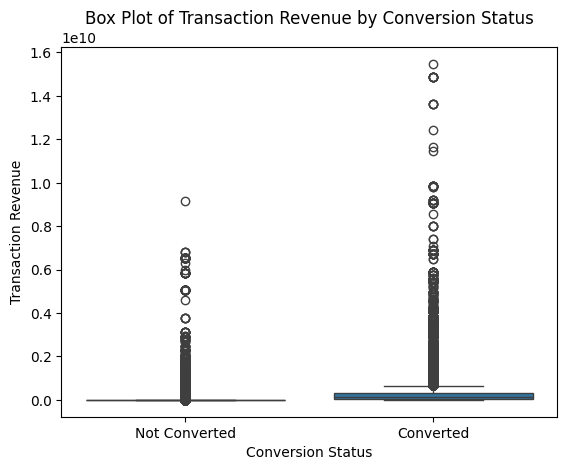

In [7]:
sns.boxplot(x='has_converted', y='transactionRevenue', data=df)
plt.xlabel('Conversion Status')
plt.ylabel('Transaction Revenue')
plt.title('Box Plot of Transaction Revenue by Conversion Status')
plt.xticks([0, 1], ['Not Converted', 'Converted'])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7752\4005196908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='has_converted', data=df, palette='viridis')


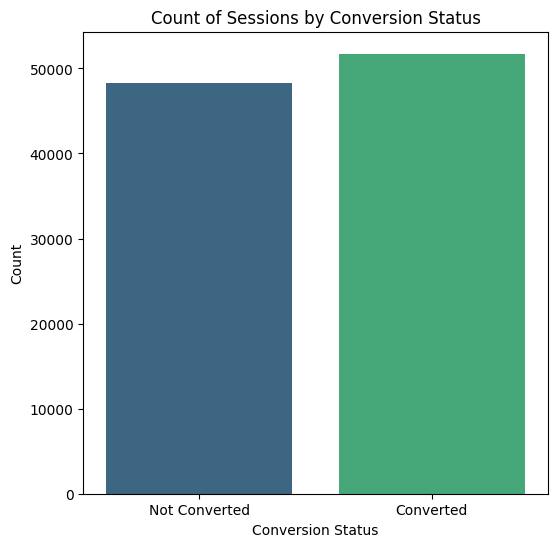

In [8]:
plt.figure(figsize=(6, 6))
sns.countplot(x='has_converted', data=df, palette='viridis')
plt.xlabel('Conversion Status')
plt.ylabel('Count')
plt.title('Count of Sessions by Conversion Status')
plt.xticks([0, 1], ['Not Converted', 'Converted'])
plt.show()

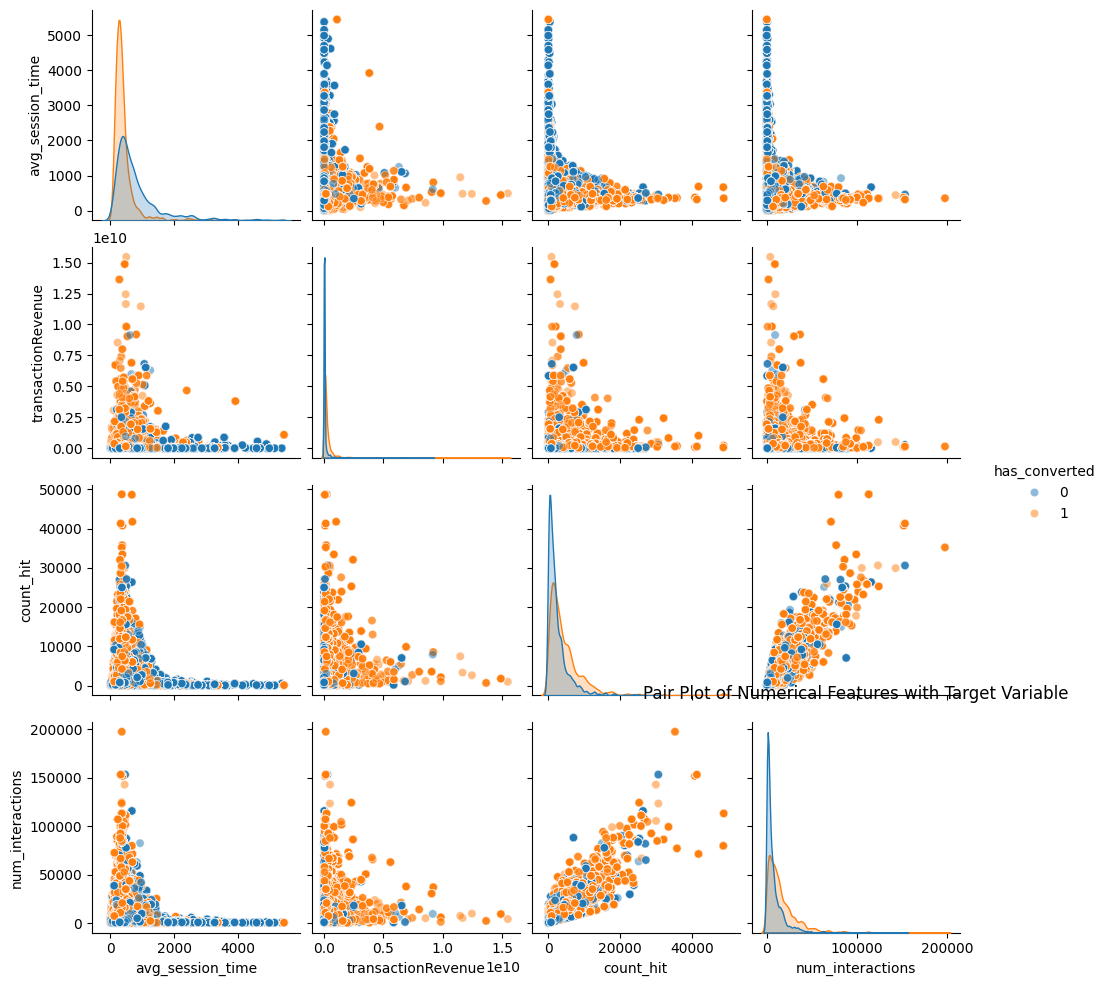

In [9]:
sns.pairplot(df[['avg_session_time', 'transactionRevenue', 'count_hit', 'num_interactions', 'has_converted']], hue='has_converted', plot_kws={'alpha': 0.5})
plt.title('Pair Plot of Numerical Features with Target Variable')
plt.show()

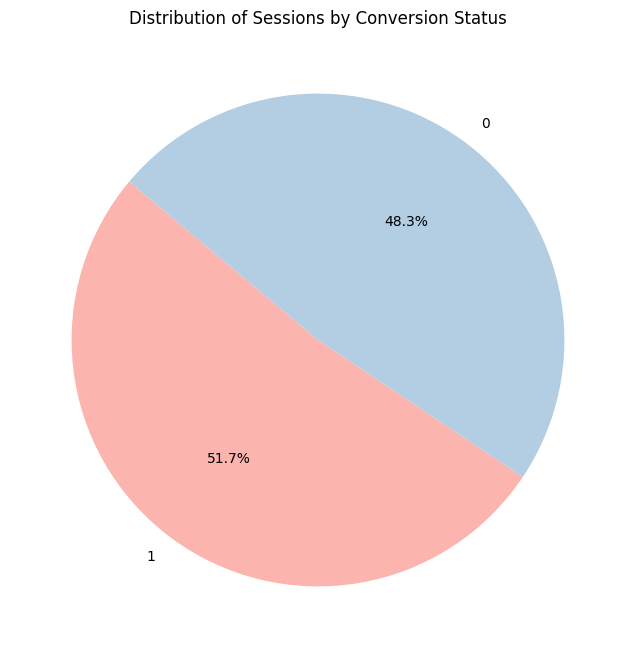

In [10]:
plt.figure(figsize=(8, 8))
df['has_converted'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Pastel1'))
plt.title('Distribution of Sessions by Conversion Status')
plt.ylabel('')
plt.show()

# STATIC ANALYSIS

In [11]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [12]:
# T-Test for significance

converted = df[df['has_converted'] == 1]['avg_session_time']
not_converted = df[df['has_converted'] == 0]['avg_session_time']

t_stat, p_value = ttest_ind(converted, not_converted, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: -101.68281986021069
P-Value: 0.0


In [13]:
# Chi-Square Test for Independence

observed = pd.crosstab(df['device_browser'], df['has_converted'])
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

Chi-Square Statistic: 3714.293608203444
P-Value: 0.0


In [14]:
from scipy.stats import f_oneway

# Exclude the '(Other)' category from the analysis
group1 = df[df['channelGrouping'] == 'Paid Search']['count_hit']
group2 = df[df['channelGrouping'] == 'Display']['count_hit']

f_stat, p_value = f_oneway(group1, group2)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 63.92988303909886
P-value: 1.3029201590503486e-15


In [15]:
print("Group Sizes:")
print("Group A:", len(group1))
print("Group B:", len(group2))

Group Sizes:
Group A: 87948
Group B: 12050


In [16]:
print("Distribution of channelGrouping:")
print(df['channelGrouping'].value_counts())

Distribution of channelGrouping:
channelGrouping
Paid Search    87948
Display        12050
(Other)            2
Name: count, dtype: int64


In [17]:
df.to_csv("df1.csv",index= False)

## ENCIDING

In [18]:
df1=pd.read_csv("df1.csv")
df1.head(2)

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01


In [19]:
obje_col = df1.select_dtypes(include=['object'])
obje_col.head(3)

,channelGrouping,device_browser,device_operatingSystem,device_deviceCategory,geoNetwork_region,earliest_source,latest_source,earliest_medium,latest_medium,earliest_keyword,latest_keyword,products_array,target_date
0,(Other),GoogleAnalytics,Android,mobile,Sharjah,gulfnews,gulfnews,app,app,(not set),(not set),food////food////food,2021-01-01
1,(Other),GoogleAnalytics,Android,mobile,Sharjah,gulfnews,gulfnews,app,app,(not set),(not set),food////food////food,2021-01-01
2,Paid Search,GoogleAnalytics,Android,mobile,Ajman,(direct),google,(none),cpc,(not set),(automatic matching),"(not set)////baby_products--milk,_food_&_juice...",2021-01-01


In [20]:

obje_col.columns

Index(['channelGrouping', 'device_browser', 'device_operatingSystem',
       'device_deviceCategory', 'geoNetwork_region', 'earliest_source',
       'latest_source', 'earliest_medium', 'latest_medium', 'earliest_keyword',
       'latest_keyword', 'products_array', 'target_date'],
      dtype='object')

In [21]:
# cat col unique val
for column in obje_col.columns:
    unique_values = df1[column].unique()
    unique_sum = len(unique_values)
    print(f" '{column}': {unique_sum}")

 'channelGrouping': 3
 'device_browser': 9
 'device_operatingSystem': 7
 'device_deviceCategory': 3
 'geoNetwork_region': 91
 'earliest_source': 36
 'latest_source': 7
 'earliest_medium': 18
 'latest_medium': 2
 'earliest_keyword': 410
 'latest_keyword': 572
 'products_array': 3559
 'target_date': 1


In [22]:

obje_col['products_array'].unique()

array(['food////food////food',
       '(not set)////baby_products--milk,_food_&_juices--baby_&_toddler_formula--baby_formula_(6-12_years)////baby_products--milk,_food_&_juices--baby_&_toddler_formula--baby_formula_(1-6_years)////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////(not set)////(not set)////baby_products--milk,_food_&_juices--baby_&_toddler_formula--baby_formula_(6-12_years)////food////(not set)////(not set)////food////food////food////food////food////baby_products--milk,_food_&_juices--baby_&_toddler_formula--baby_formula_(6-12_years)////food////food////food////baby_products--milk,_food_&_juices--baby_&_toddler_formula--baby_formula_(6-12_years)////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food

In [23]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:

df1['device_browser'].unique()

array(['GoogleAnalytics', 'Safari', 'Chrome', 'Edge', 'Firefox',
       'Samsung Internet', 'Opera', 'Android Webview',
       'Apache-HttpClient'], dtype=object)

In [25]:
# Assuming 'device_browser' is the name of the column you want to convert
browser_mapping = {'GoogleAnalytics': 1, 'Safari': 2, 'Chrome': 3, 'Edge': 4, 'Firefox': 5, 'Samsung Internet': 6, 'Opera': 7,
                   'Android Webview': 8, 'Apache-HttpClient': 9}

df1['device_browser'] = df1['device_browser'].map(browser_mapping)

In [26]:

df1['device_browser'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
df1['latest_source'].unique()

array(['gulfnews', 'google', 'Pricena_AE', 'facebook', 'criteo', 'yaoota',
       'Pricena_AE_Home'], dtype=object)

In [28]:
# Assuming 'latest_source' is the name of the column you want to convert
source_mapping = {'gulfnews': 1, 'google': 2, 'Pricena_AE': 3, 'facebook': 4, 'criteo': 5,
                  'yaoota': 6, 'Pricena_AE_Home': 7}
df1['latest_source'] = df1['latest_source'].map(source_mapping)

In [29]:
df1['geoNetwork_region'].unique()

array(['Sharjah', 'Ajman', 'Abu Dhabi', 'Dubai', 'Ras al Khaimah',
       '(not set)', 'England', 'Hessen', 'Ash Sharqia Governorate',
       'Nabatiyeh Governorate', 'Umm Al Quawain', 'Indiana', 'Illinois',
       'Makkah Province', 'Maharashtra', 'Capital Governorate', 'Jakarta',
       'Punjab', 'Mount Lebanon Governorate', 'South Holland',
       'Riyadh Province', 'Ile-de-France', 'Chandigarh', 'Karnataka',
       'Istanbul', 'Cairo Governorate', 'Andhra Pradesh',
       'Amman Governorate', 'Beirut Governorate',
       'Alexandria Governorate', 'New York', 'Ontario', 'Davao Region',
       'Auvergne-Rhone-Alpes', 'Fujairah', 'Tamil Nadu',
       'Pays de la Loire', 'Metro Manila', 'Normandy', 'Giza Governorate',
       'Bavaria', 'Stockholm County', 'Tel Aviv District', 'Vienna',
       'Decentralized Administration of Peloponnese, Western Greece and the Ionian',
       'Porto District', 'West Bengal', 'Kerala', 'Lombardy', 'MIMAROPA',
       'North Holland', 'Chiba', 'Islamabad 

In [30]:
df1['geoNetwork_region'] = df1['geoNetwork_region'].astype('category').cat.codes


In [31]:

df1['geoNetwork_region'].unique()

array([71,  2,  1, 25, 68,  0, 27, 36,  6, 56, 82, 39, 38, 51, 50, 15, 43,
       66, 54, 74, 69, 37, 19, 44, 42, 13,  5,  4, 11,  3, 58, 63, 23,  9,
       32, 77, 64, 52, 59, 33, 10, 76, 79, 85, 24, 65, 88, 45, 47, 48, 60,
       20, 40, 62, 31, 53, 21, 67, 55, 80, 84, 89, 61, 72, 86, 14, 70, 17,
       22, 90, 30, 28, 87, 78, 26, 29, 34, 75, 49, 41, 83, 16, 57, 73,  8,
       81, 46, 35,  7, 12, 18], dtype=int8)

In [32]:
# 'earliest_medium'
df1['earliest_medium'] = df1['earliest_medium'].astype('category').cat.codes

# 'earliest_keyword'
df1['earliest_keyword'] = df1['earliest_keyword'].astype('category').cat.codes

# 'latest_keyword'
df1['latest_keyword'] = df1['latest_keyword'].astype('category').cat.codes

# 'latest_keyword'
df1['earliest_source'] = df1['earliest_source'].astype('category').cat.codes

In [33]:

df1['products_array'].unique()

array(['food////food////food',
       '(not set)////baby_products--milk,_food_&_juices--baby_&_toddler_formula--baby_formula_(6-12_years)////baby_products--milk,_food_&_juices--baby_&_toddler_formula--baby_formula_(1-6_years)////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////(not set)////(not set)////baby_products--milk,_food_&_juices--baby_&_toddler_formula--baby_formula_(6-12_years)////food////(not set)////(not set)////food////food////food////food////food////baby_products--milk,_food_&_juices--baby_&_toddler_formula--baby_formula_(6-12_years)////food////food////food////baby_products--milk,_food_&_juices--baby_&_toddler_formula--baby_formula_(6-12_years)////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food////food

In [34]:
# 'latest_keyword'
df1['products_array'] = df1['products_array'].astype('category').cat.codes

In [35]:
df1['products_array'].unique()

array([2265,  898, 2234, ..., 1984, 1225, 1353], dtype=int16)

In [36]:
df1['device_deviceCategory'].unique()

array(['mobile', 'desktop', 'tablet'], dtype=object)

In [37]:
# convert through Encodeing
df1["device_deviceCategory"]= df1["device_deviceCategory"].map({'mobile':1, 'desktop':2, 'tablet':3})

In [38]:

df1['latest_medium'].unique()

array(['app', 'cpc'], dtype=object)

In [39]:
# convert through Encodeing
df1["latest_medium"]= df1["latest_medium"].map({'app':1, 'cpc':2})

In [40]:

df1['target_date']

0        2021-01-01
1        2021-01-01
2        2021-01-01
3        2021-01-01
4        2021-01-01
            ...    
99995    2021-01-01
99996    2021-01-01
99997    2021-01-01
99998    2021-01-01
99999    2021-01-01
Name: target_date, Length: 100000, dtype: object

In [41]:
# Assuming 'column_name' is the name of the column you want to convert to datetime
df1['target_date'] = pd.to_datetime(df1['target_date'], errors='coerce')

df['target_date'] = pd.to_datetime(df['target_date'], format='%Y-%m-%d', errors='coerce')
df['target_date']

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
99995   2021-01-01
99996   2021-01-01
99997   2021-01-01
99998   2021-01-01
99999   2021-01-01
Name: target_date, Length: 100000, dtype: datetime64[ns]

In [42]:
df1['channelGrouping'].unique()

array(['(Other)', 'Paid Search', 'Display'], dtype=object)

In [43]:
# convert through Encodeing
df1["channelGrouping"]= df1["channelGrouping"].map({'other':1, 'Paid Search':2, 'Display':3})


In [44]:

df1['channelGrouping'].unique()

array([nan,  2.,  3.])

In [45]:
df1['device_operatingSystem'].unique()

array(['Android', 'iOS', 'Macintosh', 'Windows', 'Chrome OS', '(not set)',
       'Linux'], dtype=object)

In [46]:
# convert through Encodeing
df1["device_operatingSystem"]= df1["device_operatingSystem"].map({'Android':1, 'iOS':2, 'Macintosh':3, 'Windows':0, 'Chrome OS':4,
                                '(not set)':5, 'Linux':6})

In [47]:
df1['device_operatingSystem'].unique()

array([1, 2, 3, 0, 4, 5, 6])

In [48]:
df1.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'last_visitId',
       'latest_visit_id', 'visitId_threshold', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_last_visit',
       'days_since_first_visit', 'visits_per_day', 'bounce_rate',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'bounces', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted', 't

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   count_session           100000 non-null  int64         
 1   count_hit               100000 non-null  int64         
 2   channelGrouping         99998 non-null   float64       
 3   totals_newVisits        100000 non-null  int64         
 4   device_browser          100000 non-null  int64         
 5   device_operatingSystem  100000 non-null  int64         
 6   device_isMobile         100000 non-null  bool          
 7   device_deviceCategory   100000 non-null  int64         
 8   geoNetwork_region       100000 non-null  int8          
 9   geoNetwork_latitude     100000 non-null  float64       
 10  geoNetwork_longitude    100000 non-null  float64       
 11  historic_session        100000 non-null  int64         
 12  historic_session_page   100000 

## binning and Discretization of this columns. Because its have huge level of uniques values

In [50]:
# Assuming df1 is your DataFrame containing the data
bins = {
    'avg_session_time': [0, 1000, 5000, float('inf')],  # Define your bins for avg_session_time
    'count_hit': [0, 100, 1000, float('inf')],          # Define your bins for count_hit
    'num_interactions': [0, 1000, 5000, float('inf')]   # Define your bins for num_interactions
}

labels = ['low', 'medium', 'high']  # Define labels for each bin

# Bin the numerical columns
for column, bin_edges in bins.items():
    df1[column + '_binned'] = pd.cut(df1[column], bins=bin_edges, labels=labels, right=False)

# Drop the original numerical columns
df1.drop(columns=['avg_session_time', 'avg_session_time', 'num_interactions'], inplace=True)

# Display the modified DataFrame
print(df1)

       count_session  count_hit  channelGrouping  totals_newVisits  \
0                  9       1194              NaN                 0   
1                  9       1194              NaN                 0   
2                 28       1816              2.0                 0   
3                  2        299              2.0                 0   
4                  2        299              2.0                 0   
...              ...        ...              ...               ...   
99995             58      12340              2.0                 0   
99996             58      12340              2.0                 0   
99997             58      12340              2.0                 0   
99998             58      12340              2.0                 0   
99999             58      12340              2.0                 0   

       device_browser  device_operatingSystem  device_isMobile  \
0                   1                       1             True   
1                   1      

In [51]:
df1['avg_session_time_binned'].unique()

['low', 'medium', 'high']
Categories (3, object): ['low' < 'medium' < 'high']

In [52]:
df1['count_hit_binned'].unique()

['high', 'medium', 'low']
Categories (3, object): ['low' < 'medium' < 'high']

In [53]:
df1['num_interactions_binned'].unique()

['medium', 'low', 'high']
Categories (3, object): ['low' < 'medium' < 'high']

In [54]:
df1["avg_session_time_binned"]= df1["avg_session_time_binned"].map({'low':1, 'medium':2, 'high':3})
df1["count_hit_binned"]= df1["count_hit_binned"].map({'low':1, 'medium':2, 'high':3})
df1["num_interactions_binned"]= df1["num_interactions_binned"].map({'low':1, 'medium':2, 'high':3})

In [55]:
df1["sessionQualityDim"]

0         6
1         6
2         4
3        42
4        42
         ..
99995    11
99996    11
99997    11
99998    11
99999    11
Name: sessionQualityDim, Length: 100000, dtype: int64

In [56]:

df1['single_page_rate'].unique()

array([0.77777778, 0.82142857, 1.        , 0.4       , 0.98701299,
       0.92857143, 0.96296296, 0.75      , 0.25      , 0.66666667,
       0.83673469, 0.175     , 0.88888889, 0.86363636, 0.73913043,
       0.97058824, 0.98507463, 0.91428571, 0.625     , 0.        ,
       0.14285714, 0.93333333, 0.97368421, 0.71428571, 0.8       ,
       0.93589744, 0.81818182, 0.94444444, 0.5       , 0.90909091,
       0.33333333, 0.83333333, 0.9       , 0.6       , 0.97560976,
       0.89473684, 0.96666667, 0.41666667, 0.63157895, 0.125     ,
       0.95238095, 0.76923077, 0.16666667, 0.94814815, 0.78571429,
       0.94117647, 0.95833333, 0.92307692, 0.88235294, 0.76470588,
       0.96551724, 0.80645161, 0.58823529, 0.28571429, 0.95      ,
       0.85714286, 0.61111111, 0.93181818, 0.2       , 0.78787879,
       0.63333333, 0.88461538, 0.93548387, 0.97727273, 0.76296296,
       0.95918367, 0.875     , 0.98113208, 0.36363636, 0.95454545,
       0.87037037, 0.7       , 0.94736842, 0.95652174, 0.94366

In [57]:
# This col have huge leval of values so do this 4 encoding and after doing binning and Discretization

# # selected_features
# sessionQualityDim
# avg_session_time_binned
# single_page_rate
# count_hit_binned
# num_interactions_binned

In [58]:

df1['sessionQualityDim'].unique()

array([  6,   4,  42,   2,   5,   8,  14,  25,  44,   3,   1,  45,   7,
        11,  53,  54,  10,   9,  56,  55,  15,  64,  41,  17,  16,  24,
        34,  62,  21,  18,  61,  37,  48,  33,  23,  47,  40,  59,  52,
        57,  39,  22,  19,  50,  26,  51,  49,  46,  43,  60,  29,  38,
        20,  13,  12,  63,  31,  32,  35,  58,  36,  27,  28, 100,  65,
        30,  66])

In [59]:
df1['single_page_rate'].unique()

array([0.77777778, 0.82142857, 1.        , 0.4       , 0.98701299,
       0.92857143, 0.96296296, 0.75      , 0.25      , 0.66666667,
       0.83673469, 0.175     , 0.88888889, 0.86363636, 0.73913043,
       0.97058824, 0.98507463, 0.91428571, 0.625     , 0.        ,
       0.14285714, 0.93333333, 0.97368421, 0.71428571, 0.8       ,
       0.93589744, 0.81818182, 0.94444444, 0.5       , 0.90909091,
       0.33333333, 0.83333333, 0.9       , 0.6       , 0.97560976,
       0.89473684, 0.96666667, 0.41666667, 0.63157895, 0.125     ,
       0.95238095, 0.76923077, 0.16666667, 0.94814815, 0.78571429,
       0.94117647, 0.95833333, 0.92307692, 0.88235294, 0.76470588,
       0.96551724, 0.80645161, 0.58823529, 0.28571429, 0.95      ,
       0.85714286, 0.61111111, 0.93181818, 0.2       , 0.78787879,
       0.63333333, 0.88461538, 0.93548387, 0.97727273, 0.76296296,
       0.95918367, 0.875     , 0.98113208, 0.36363636, 0.95454545,
       0.87037037, 0.7       , 0.94736842, 0.95652174, 0.94366

In [60]:

df1.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time_page', 'single_page_rate',
       'sessionQualityDim', 'last_visitId', 'latest_visit_id',
       'visitId_threshold', 'earliest_visit_id', 'earliest_visit_number',
       'latest_visit_number', 'time_earliest_visit', 'time_latest_visit',
       'avg_visit_time', 'days_since_last_visit', 'days_since_first_visit',
       'visits_per_day', 'bounce_rate', 'earliest_source', 'latest_source',
       'earliest_medium', 'latest_medium', 'earliest_keyword',
       'latest_keyword', 'earliest_isTrueDirect', 'latest_isTrueDirect',
       'bounces', 'time_on_site', 'transactionRevenue', 'products_array',
       'has_converted', 'target_date', 'avg_session_time_binned',


In [61]:
# Assuming 'df1' is your DataFrame
numeric_columns = df1.select_dtypes(include=[np.number]).columns
z_scores = np.abs((df1[numeric_columns] - df1[numeric_columns].mean()) / df1[numeric_columns].std())

# Set a threshold (e.g., 3) for z-scores
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Handle outliers (replace with NaN, remove, or apply a transformation)
df1[outliers] = np.nan  # Replace outliers with NaN
# OR
df1 = df1[~outliers]

C:\Users\HP\AppData\Local\Temp\ipykernel_7752\2555548581.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df1[outliers] = np.nan  # Replace outliers with NaN
C:\Users\HP\AppData\Local\Temp\ipykernel_7752\2555548581.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df1[outliers] = np.nan  # Replace outliers with NaN
C:\Users\HP\AppData\Local\Temp\ipykernel_7752\2555548581.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df1[outliers] = np.nan  # Replace outl

In [62]:
df1.head(2)

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_isTrueDirect,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date,avg_session_time_binned,count_hit_binned,num_interactions_binned
2,28.0,1816.0,2.0,0.0,1.0,1.0,True,1.0,2.0,25.4052,...,True,0.0,77417.0,1.477195e+09,898.0,1.0,2021-01-01,1,3,2
3,2.0,299.0,2.0,0.0,1.0,1.0,True,1.0,1.0,24.4539,...,True,0.0,1576.0,0.000000e+00,2234.0,0.0,2021-01-01,1,2,1


In [63]:
df1.to_csv("df2.csv",index= False)

## Future selectioning

In [64]:
df1.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time_page', 'single_page_rate',
       'sessionQualityDim', 'last_visitId', 'latest_visit_id',
       'visitId_threshold', 'earliest_visit_id', 'earliest_visit_number',
       'latest_visit_number', 'time_earliest_visit', 'time_latest_visit',
       'avg_visit_time', 'days_since_last_visit', 'days_since_first_visit',
       'visits_per_day', 'bounce_rate', 'earliest_source', 'latest_source',
       'earliest_medium', 'latest_medium', 'earliest_keyword',
       'latest_keyword', 'earliest_isTrueDirect', 'latest_isTrueDirect',
       'bounces', 'time_on_site', 'transactionRevenue', 'products_array',
       'has_converted', 'target_date', 'avg_session_time_binned',


In [65]:
df2 = pd.read_csv("df2.csv")
df2.head(2)

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_isTrueDirect,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date,avg_session_time_binned,count_hit_binned,num_interactions_binned
0,28.0,1816.0,2.0,0.0,1.0,1.0,True,1.0,2.0,25.4052,...,True,0.0,77417.0,1.477195e+09,898.0,1.0,2021-01-01,1,3,2
1,2.0,299.0,2.0,0.0,1.0,1.0,True,1.0,1.0,24.4539,...,True,0.0,1576.0,0.000000e+00,2234.0,0.0,2021-01-01,1,2,1


In [66]:
df1.columns.unique()

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time_page', 'single_page_rate',
       'sessionQualityDim', 'last_visitId', 'latest_visit_id',
       'visitId_threshold', 'earliest_visit_id', 'earliest_visit_number',
       'latest_visit_number', 'time_earliest_visit', 'time_latest_visit',
       'avg_visit_time', 'days_since_last_visit', 'days_since_first_visit',
       'visits_per_day', 'bounce_rate', 'earliest_source', 'latest_source',
       'earliest_medium', 'latest_medium', 'earliest_keyword',
       'latest_keyword', 'earliest_isTrueDirect', 'latest_isTrueDirect',
       'bounces', 'time_on_site', 'transactionRevenue', 'products_array',
       'has_converted', 'target_date', 'avg_session_time_binned',


In [67]:
# selected_features
# sessionQualityDim
# avg_session_time_binned
# single_page_rate
# count_hit_binned
# num_interactions_binned


In [68]:

selected_features = ['sessionQualityDim', 'avg_session_time_binned', 'single_page_rate', 'count_hit_binned', 'num_interactions_binned']
X = df2[selected_features]
y = df2['has_converted']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# Initialize the RandomForestClassifier
RFC = RandomForestClassifier()

# Fit the model on the training set
RFC.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = RFC.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get feature importances
feature_importances = RFC.feature_importances_
print("Feature Importances:")
for feature, importance in zip(selected_features, feature_importances):
    print(f"{feature}: {importance}")

Accuracy: 0.8581227689507944
Feature Importances:
sessionQualityDim: 0.40075241371270354
avg_session_time_binned: 0.028387275605272527
single_page_rate: 0.40935262825006224
count_hit_binned: 0.05035719933960115
num_interactions_binned: 0.11115048309236053


In [72]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Feature importances
feature_importances = {
    'sessionQualityDim': 0.19338234524186065,
    'avg_session_time': 0.21958626982968277,
    'single_page_rate': 0.1566488109381351,
    'count_hit': 0.19458874134598625,
    'num_interactions': 0.23579383264433512
}

Precision: 0.8124031007751938
Recall: 0.9565784326509323
F1 Score: 0.8786154859572429


In [73]:
# Initialize the RandomForestClassifier
RFC = RandomForestClassifier()

# Fit the model on the training set
RFC.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RFC.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get feature importances
feature_importances = RFC.feature_importances_

Accuracy: 0.8588227059564639


In [74]:
# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_features = X.columns[sorted_indices]

In [75]:
# Select top N features
top_n = 5
selected_features = sorted_features[:top_n]
print("Selected Features:", selected_features)

Selected Features: Index(['single_page_rate', 'sessionQualityDim', 'num_interactions_binned',
       'count_hit_binned', 'avg_session_time_binned'],
      dtype='object')


In [76]:
# Alternatively, you can specify a threshold for feature importance and select features above that threshold
threshold = 0.1
selected_features_above_threshold = sorted_features[sorted_feature_importances > threshold]
print("Selected Features above threshold:", selected_features_above_threshold)

Selected Features above threshold: Index(['single_page_rate', 'sessionQualityDim', 'num_interactions_binned'], dtype='object')


In [77]:
# Remove less important features
# For example, let's remove features with importance below a certain threshold (e.g., 0.05)
threshold = 0.05
selected_features = sorted_features[sorted_feature_importances >= threshold]
print("Selected Features after removing less important features:", selected_features)

Selected Features after removing less important features: Index(['single_page_rate', 'sessionQualityDim', 'num_interactions_binned'], dtype='object')


In [78]:

import pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(RFC, model_file)

In [79]:
# Importing the required library
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
random_forest_classifier = RandomForestClassifier()

# Train the classifier
random_forest_classifier.fit(X_train, y_train)

# Predict probabilities
predictions = random_forest_classifier.predict(X_test)
predicted_probabilities = random_forest_classifier.predict_proba(X_test)

In [80]:

predicted_probabilities

array([[0.        , 1.        ],
       [0.43847112, 0.56152888],
       [0.16412959, 0.83587041],
       ...,
       [1.        , 0.        ],
       [0.16892743, 0.83107257],
       [1.        , 0.        ]])

In [81]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVC": SVC(),
    "KNeighbors": KNeighborsClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy:", accuracy)

RandomForest Accuracy: 0.8594526492615665
GradientBoosting Accuracy: 0.8129068383845454


c:\Users\HP\OneDrive\Desktop\Final Project\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7952684258416742
SVC Accuracy: 0.769510744033037
KNeighbors Accuracy: 0.8434240918317352


## KNeighborsclassifiers model-2

In [82]:
# Initialize the KNeighborsClassifier
KNN = KNeighborsClassifier()

# Fit the model on the training set
KNN.fit(X_train, y_train)

# Make predictions on the test set
y_pred = KNN.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8434240918317352


In [83]:
import pickle
# Save the trained model to a file
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(KNN, file)

## GradientBoosting Accuracy model-3

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the GradientBoostingClassifier
GB = GradientBoostingClassifier()

# Fit the model on the training set
GB.fit(X_train, y_train)

# Make predictions on the test set
y_pred_GB = GB.predict(X_test)

# Evaluate the model
accuracy_GB = accuracy_score(y_test, y_pred_GB)
print("GradientBoosting Accuracy:", accuracy_GB)

GradientBoosting Accuracy: 0.8129068383845454


In [85]:
# Save the trained model to a file
with open('gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(GB, file)

## AdaBoost Accuracy model-4

In [86]:
# Initialize the AdaBoostClassifier
AdaBoost = AdaBoostClassifier()

# Fit the model on the training set
AdaBoost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_AdaBoost = AdaBoost.predict(X_test)

# Evaluate the model
accuracy_AdaBoost = accuracy_score(y_test, y_pred_AdaBoost)
print("AdaBoost Accuracy:", accuracy_AdaBoost)

c:\Users\HP\OneDrive\Desktop\Final Project\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7952684258416742


In [87]:
# Save the trained model to a file
with open('adaboost_model.pkl', 'wb') as file:
    pickle.dump(AdaBoost, file)

## SVC Accuracy model-5

In [88]:
from sklearn.svm import SVC

# Initialize the SVC
SVC_model = SVC()

# Fit the model on the training set
SVC_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_SVC = SVC_model.predict(X_test)

# Evaluate the model
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
print("SVC Accuracy:", accuracy_SVC)

SVC Accuracy: 0.769510744033037


In [89]:
# Save the trained model to a file
with open('svc_model.pkl', 'wb') as file:
    pickle.dump(SVC_model, file)

## Get results

In [89]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate each model
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print the results
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Model: Random Forest
Accuracy: 0.8594526492615665
Precision: 0.815025041736227
Recall: 0.9548832963880558
F1 Score: 0.879428365557824

Model: Logistic Regression
Accuracy: 0.762721355078043
Precision: 0.7320750623711899
Recall: 0.8800365106272005
F1 Score: 0.799265750828991

Model: Support Vector Machine
Accuracy: 0.769510744033037
Precision: 0.7390211929211273
Recall: 0.88212283218151
F1 Score: 0.8042560779884682

Model: K-Nearest Neighbors
Accuracy: 0.8434240918317352
Precision: 0.7990530720105704
Recall: 0.9462772199765289
F1 Score: 0.8664557339860307

Model: Decision Tree
Accuracy: 0.8588227059564639
Precision: 0.8145592163846839
Recall: 0.9542313209023341
F1 Score: 0.8788806821593707



## Gridsearchcv

In [90]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each model
param_grid = {
    "RandomForest": {
        "n_estimators": [50, 100, 150],
        "max_depth": [None, 10, 20]
    },
    "GradientBoosting": {
        "n_estimators": [50, 100, 150],
        "learning_rate": [0.01, 0.1, 1.0]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 150],
        "learning_rate": [0.01, 0.1, 1.0]
    },
    "SVC": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "KNeighbors": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    }
}

In [91]:
# Initialize models
models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVC": SVC(),
    "KNeighbors": KNeighborsClassifier()
}

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import joblib

# Initialize GridSearchCV for each model
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

# Save the best models using joblib
for name, model in best_models.items():
    joblib.dump(model, f"{name}_best_model.pkl")

# Now you can load the best models whenever needed
loaded_models = {}
for name in best_models:
    loaded_models[name] = joblib.load(f"{name}_best_model.pkl")

## Recomendation

In [90]:

movie = pd.read_csv("C:/Users/HP/OneDrive/Desktop/Final Project/tmdb_5000_movies.csv")
credit = pd.read_csv("C:/Users/HP/OneDrive/Desktop/Final Project/tmdb_5000_credits.csv")

In [ ]:
movie.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [91]:
credit.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [92]:

print(movie.shape)
print(credit.shape)

(4803, 20)
(4803, 4)


In [93]:

merge = movie.merge(credit, on='title')
merge.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [ ]:

movie.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [ ]:
# unwanted columns(9)
# budget, # homepage, # id, # original_language, # original_title, # popularity
# production_comapny, # production_countries, # release-date(not sure)

In [94]:
merge = merge[['movie_id','title','overview','genres','keywords','cast','crew']]
merge.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [95]:
merge.isna().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [96]:
# Drop null values
merge.dropna(inplace=True)

In [97]:
import ast
def convert(object):
    list=[]
    for i in ast.literal_eval(object):
        list.append(i['name'])
    return list

In [98]:
merge['genres']=merge['genres'].apply(convert)

In [99]:

merge.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [100]:

merge['keywords']=merge['keywords'].apply(convert)

In [101]:
import ast
def convert3(obj):
    list=[]
    count=0
    for i in ast.literal_eval(obj):
        if count != 3:
            list.append(i['name'])
            count+=1
        else:
            break
    return list

In [102]:

merge['cast'] = merge['cast'].apply(convert3)

In [103]:
def director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [105]:
merge['crew'] = merge['crew'].apply(director)

In [104]:
merge.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [106]:

merge['overview']=merge['overview'].apply(lambda x:x.split())

In [107]:
merge.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]


In [108]:

merge['genres']=merge['genres'].apply(lambda x:[i.replace(" ","") for i in x])
merge['keywords']=merge['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
merge['crew']=merge['crew'].apply(lambda x:[i.replace(" ","") for i in x])
merge['cast']=merge['cast'].apply(lambda x:[i.replace(" ","") for i in x])

In [109]:
merge['tags'] = merge['overview'] + merge['genres'] + merge['keywords'] + merge['cast'] + merge['crew']

In [110]:
merge=merge[['movie_id','title','tags']]
merge.head(3)

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."


In [111]:
merge['tags']=merge['tags'].apply(lambda x:" ".join(x))

In [112]:
merge['tags']=merge['tags'].apply(lambda x:x.lower())
merge.head(3)

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...


In [113]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'tags' column is already preprocessed and stored in 'merge' DataFrame
tags = merge['tags']

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'tags' column
vectors = vectorizer.fit_transform(tags)

# Convert the result to an array
vectors_array = vectors.toarray()

In [114]:
vectors

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 261807 stored elements and shape (4806, 35831)>

In [115]:
dense_array = vectors.toarray()
print(dense_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [116]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'merge' is your DataFrame and 'tags' is the column to vectorize
v = CountVectorizer()
vectors = v.fit_transform(merge['tags'].values.astype('U'))  # Fit and transform on the 'tags' column

# Now you can get the feature names
feature_names = v.get_feature_names_out()
print(feature_names)

['00' '000' '007' ... '张立' '绝地奶霸' '超级妈妈']


In [117]:

len(feature_names)

35831

## Steeamming

In [119]:
import nltk
from nltk.stem.porter import PorterStemmer

In [120]:
ps=PorterStemmer()

In [121]:
def stem(text):
    li=[]
    for i in text.split():
        li.append(ps.stem(i))
    string=" ".join(li)
    return string

## Measuring Cosine Distance between vectors

In [122]:
from sklearn.metrics.pairwise import cosine_similarity

In [123]:
similarity =cosine_similarity(vectors)

In [124]:
similarity[0]

array([1.        , 0.22955001, 0.19057225, ..., 0.2150224 , 0.16378533,
       0.11822676])

In [125]:
def recommend(movie_title, movie):
    movie_index = movie[movie['title'] == movie_title].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
    for i in movies_list:
        print(movie.iloc[i[0]]['title'])

In [126]:
recommend('Avatar', movie)

Ri¢hie Ri¢h
Independence Day
No Escape
Battle: Los Angeles
Starship Troopers


In [127]:

merge.tail(3)

,movie_id,title,tags
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,when ambitious new york attorney sam is sent t...
4808,25975,My Date with Drew,ever since the second grade when he first saw ...


## Exporting to Create GUI

In [128]:
import pickle

In [129]:
pickle.dump(movie.to_dict(),open('movies.pkl','wb'))

## st page creation

## Home Page creation

In [ ]:
def page1():
    col1, col2 = st.columns([2, 1])
    with col2:
        st.image("Image/e-commerce-business-1024x683.jpg", use_column_width=True)
        st.image("Image/Ecommerce-Shopping-Infographics.png", use_column_width=True)
    with col1:
        st.markdown("""
        ## Project Overview

        - **DataFrame Analysis:** Explore detailed insights and outcomes from our ML models. Witness a comprehensive breakdown of model performances, including accuracy, precision, recall, and F1-score, neatly organized in a tabular format.
        - **Exploratory Data Analysis (EDA):** Embark on a visual journey through our dataset, unraveling hidden patterns and trends through interactive plots and charts.
        - **Prediction Engine:** Experience the power of predictive analytics as we forecast the likelihood of visitor conversion with real-time prediction probabilities.

        **Image Analysis:**
        - Utilize a range of image preprocessing techniques.
        - Extract and present text from images for further analysis.

        **NLP Text Preprocessing:**
        - Witness the transformation of raw text data through processes such as stemming, lowercasing, and more.
        - Explore sentiment analysis with vivid bar chart visualizations, providing invaluable insights into customer sentiments.
        - Immerse yourself in the art of word clouding to gain a holistic perspective of your textual data.

        **Recommendations System:**
        - Discover global recommendations crafted using custom movie datasets.
        - Personalized suggestions tailored to user preferences.
        """)

## EDA Vis

In [130]:
def generate_model_table(model_name, accuracy, precision, recall, support, f1):
    model_table = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'Support': [support],
        'F1 Score': [f1]
    })
    return model_table

def page2():
    st.title("DataFrame")
    st.write("")

    path = "classification_data.csv"
    df = pd.read_csv(path)
    st.dataframe(df)

    # Placeholder values, replace with actual metrics
    model_metrics = [
        ('RFC', 0.9968, 1.00, 1.00, 20000, 1.00),
        ('KNN', 0.9877, 0.99, 0.99, 20000, 0.99),
        ('SVM', 0.9965, 1.00, 1.00, 20000, 1.00),
        ('LinearSVC', 0.68175, 0.69, 0.68, 20000, 0.68),
        ('XGBoost', 0.9984, 1.00, 1.00, 20000, 1.00)
    ]

    # Create a list to store DataFrames for each model
    model_tables = []

    # Generate model tables and store in the list
    for model_name, accuracy, precision, recall, support, f1 in model_metrics:
        model_table = generate_model_table(model_name, accuracy, precision, recall, support, f1)
        model_tables.append(model_table)

    # Concatenate DataFrames for all models
    df_results = pd.concat(model_tables, ignore_index=True)

    # Display the DataFrame using Streamlit
    st.title("Algorithm results")
    st.dataframe(df_results)

## Data & Result Vis

In [131]:
def page3():
    st.title("Exploratory Data Analysis (EDA)")
    st.write("")

    path = "classification_data.csv"
    df = pd.read_csv(path)

    col1, col2, col3 = st.columns(3)

    with col1:
        fig1, ax1 = plt.subplots(figsize=(8, 6))
        sns.histplot(df['count_session'], bins=30, kde=True, color='blue', ax=ax1)
        plt.title('Distribution of count_session')
        plt.xlabel('count_session')
        plt.ylabel('Frequency')
        st.pyplot(fig1)

    with col2:
        fig2, ax2 = plt.subplots(figsize=(10, 6))
        sns.countplot(x='channelGrouping', data=df, palette='viridis', ax=ax2)
        plt.title('Count of channelGrouping')
        plt.xlabel('channelGrouping')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        st.pyplot(fig2)

    with col3:
        total_visitors = df['has_converted'].count()
        buyed_visitors = df['has_converted'].sum()

        fig3, ax3 = plt.subplots(figsize=(8, 6))
        sns.barplot(x=['Total Visitors', 'Buyed Visitors'], y=[total_visitors, buyed_visitors], palette='viridis', ax=ax3)
        ax3.set_ylabel('Count')
        ax3.set_title('Total Visitors vs. Buyed Visitors')

        st.pyplot(fig3)

    with col2:
        fig4, ax4 = plt.subplots(figsize=(8, 6))
        sns.scatterplot(x='time_on_site', y='transactionRevenue', data=df, ax=ax4)
        plt.title('Scatter Plot: time_on_site vs. transactionRevenue')
        plt.xlabel('Time on Site')
        plt.ylabel('Transaction Revenue')
        st.pyplot(fig4)

        fig5, ax5 = plt.subplots(figsize=(10, 6))
        numerical_columns = ['count_session', 'count_hit', 'avg_session_time', 'time_on_site', 'transactionRevenue']
        sns.pairplot(df[numerical_columns], height=2, diag_kind='kde', plot_kws={'alpha': 0.5})
        plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
        st.pyplot(fig5)

        fig6, ax6 = plt.subplots(figsize=(8, 6))
        sns.boxplot(x='time_on_site', data=df, ax=ax6)
        plt.title('Boxplot: time_on_site')
        st.pyplot(fig6)

## Prediction & Probability Vis

In [132]:
bin_mapping = {
    'avg_session_time_binned': {'low': [0, 500], 'medium': [500, 1000], 'high': [1000, np.inf]},
    'count_hit_binned': {'low': [0, 100], 'medium': [100, 200], 'high': [200, np.inf]},
    'num_interactions_binned': {'low': [0, 1000], 'medium': [1000, 5000], 'high': [5000, np.inf]}
}

avg_session_time_options = list(bin_mapping['avg_session_time_binned'].keys())
count_hit_options = list(bin_mapping['count_hit_binned'].keys())
num_interactions_options = list(bin_mapping['num_interactions_binned'].keys())

df1 = pd.read_csv('df1.csv')

sessionQualityDim_options = df1['sessionQualityDim'].unique().tolist()
single_page_rate_options = df1['single_page_rate'].unique().tolist()

def predict(model, features):
    df = pd.DataFrame(features, columns=['sessionQualityDim', 'avg_session_time_binned', 'single_page_rate', 'count_hit_binned', 'num_interactions_binned'])


    prediction = model.predict(df)
    prediction_proba = model.predict_proba(df)[:, 1]
    return prediction, prediction_proba

def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

model = load_model('random_forest_model.pkl')

def page4():
    st.title("Prediction")

    selected_num_interactions = st.selectbox('Select num_interactions:', options=num_interactions_options)
    selected_avg_session_time = st.selectbox('Select avg_session_time:', options=avg_session_time_options)
    selected_sessionQualityDim = st.selectbox('Select sessionQualityDim:', options=sessionQualityDim_options)
    selected_count_hit = st.selectbox('Select count_hit:', options=count_hit_options)
    selected_single_page_rate = st.selectbox('Select single_page_rate:', options=single_page_rate_options)

    if st.button('Predict'):
        features = np.array([[selected_num_interactions, selected_avg_session_time,
                              selected_sessionQualityDim, selected_count_hit,
                              selected_single_page_rate]])

        feature_names = ['num_interactions', 'avg_session_time', 'sessionQualityDim', 'count_hit', 'single_page_rate']
        features_df = pd.DataFrame(features, columns=feature_names)

        prediction, prediction_proba = predict(model, features_df)

        with st.container():
            st.write('Prediction:', "Yes" if prediction == 1 else "No")
            st.write('Prediction Probability:', prediction_proba)

## Image Preprocessing

In [133]:
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


def preprocess_resize(original_image, target_size=(200, 200)):
    resized_image = original_image.resize(target_size)
    return resized_image

def preprocess_contrast(original_image, factor=2.0):
    contrast_image = ImageEnhance.Contrast(original_image).enhance(factor)
    return contrast_image

def preprocess_brightness(original_image, factor=1.5):
    brightness_image = ImageEnhance.Brightness(original_image).enhance(factor)
    return brightness_image

def preprocess_rotation(original_image, rotation_angle=45):
    rotated_image = ImageOps.exif_transpose(original_image.rotate(rotation_angle))
    return rotated_image

def preprocess_flip(original_image, flip_type="horizontal"):
    if flip_type == "horizontal":
        flipped_image = original_image.transpose(Image.FLIP_LEFT_RIGHT)
    elif flip_type == "vertical":
        flipped_image = original_image.transpose(Image.FLIP_TOP_BOTTOM)
    else:
        flipped_image = original_image
    return flipped_image

def preprocess_crop(original_image, coordinates=(50, 50, 150, 150)):
    cropped_image = original_image.crop(coordinates)
    return cropped_image

def preprocess_grayscale(original_image):
    grayscale_image = original_image.convert("L")
    return grayscale_image

def preprocess_edge_detection(original_image):
    img_array = np.array(original_image)
    gray_image = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray_image, 100, 200)
    processed_image = ImageOps.grayscale(Image.fromarray(edges))
    return processed_image

def preprocess_text_extraction(original_image):
    img_array = np.array(original_image)
    gray_image = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
    extracted_text = pytesseract.image_to_string(gray_image)

    return extracted_text

def preprocess_color_space_conversion(original_image, color_space="HSV"):
    if color_space == "HSV":
        converted_image = original_image.convert("HSV")
    else:
        converted_image = original_image.convert("RGB")

    if color_space == "HSV":
        converted_image = converted_image.convert("RGB")

    return converted_image

def preprocess_histogram_equalization(original_image):
    if original_image.mode == 'RGBA':
        original_image = original_image.convert('RGB')

    equalized_image = ImageOps.equalize(original_image)
    return equalized_image

def preprocess_image_filtering(original_image, filter_type="gaussian"):
    if filter_type == "gaussian":
        filtered_image = original_image.filter(ImageFilter.GaussianBlur(radius=2))
    elif filter_type == "median":
        filtered_image = original_image.filter(ImageFilter.MedianFilter(size=3))
    else:
        filtered_image = original_image
    return filtered_image

# def preprocess_text_extraction(original_image):
#     img_array = np.array(original_image)
#     gray_image = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
#     extracted_text = pytesseract.image_to_string(gray_image)

#     if not extracted_text:
#         return "No text found."

#     return extracted_text



def page5():
    st.title("Image-Analysis")

    uploaded_image = st.file_uploader("Upload Image", type=["png", "jpeg", "jpg"])

    if uploaded_image is not None:
        original_image = Image.open(uploaded_image)

        col1, col2, col3 = st.columns(3)
        with col1:
            st.image(original_image, caption="Original Image", use_column_width=True)

        processed_resized_image = preprocess_resize(original_image)
        processed_contrast_image = preprocess_contrast(original_image, factor=2.0)
        processed_brightness_image = preprocess_brightness(original_image, factor=1.5)
        processed_rotation_image = preprocess_rotation(original_image, rotation_angle=45)
        processed_flip_horizontal_image = preprocess_flip(original_image, flip_type="horizontal")
        processed_crop_image = preprocess_crop(original_image, coordinates=(50, 50, 150, 150))
        processed_grayscale_image = preprocess_grayscale(original_image)
        processed_edge_image = preprocess_edge_detection(original_image)
        processed_color_space_image = preprocess_color_space_conversion(original_image, color_space="HSV")
        processed_equalized_image = preprocess_histogram_equalization(original_image)
        processed_filtered_image = preprocess_image_filtering(original_image, filter_type="gaussian")


        with col1:
            st.image(processed_resized_image, caption="Resized Image", use_column_width=True)
            st.image(processed_crop_image, caption="Cropped Image", use_column_width=True)
            st.image(processed_grayscale_image, caption="Grayscale Conversion Result", use_column_width=True)

        with col2:
            st.image(processed_contrast_image, caption="Contrast Adjustment Result", use_column_width=True)
            st.image(processed_brightness_image, caption="Brightness Adjustment Result", use_column_width=True)
            st.image(processed_color_space_image, caption="Color Space Conversion Result", use_column_width=True)
            st.image(processed_equalized_image, caption="Histogram Equalization Result", use_column_width=True)

        with col3:
            st.image(processed_rotation_image, caption="Rotation Result", use_column_width=True)
            st.image(processed_flip_horizontal_image, caption="Horizontal Flip Result", use_column_width=True)
            st.image(processed_edge_image, caption="Edge Detection Result", use_column_width=True)
            st.image(processed_filtered_image, caption="Image Filtering Result", use_column_width=True)



        extracted_text = preprocess_text_extraction(original_image)

        st.write("Extracted Text:")
        st.write(extracted_text)

## NLP Text Preprocessing

In [134]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')




def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_text = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_text)

def perform_stemming(text):
    ps = PorterStemmer()
    words = word_tokenize(text)
    stemmed_text = [ps.stem(word) for word in words]
    return ' '.join(stemmed_text)

def perform_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_text)

def remove_punctuation_special_chars(text):
    return ''.join(char for char in text if char not in string.punctuation)

def remove_numbers(text):
    return ''.join(char for char in text if not char.isdigit())

def get_part_of_speech(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    return pos_tags

def perform_sentiment_analysis(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)

    if sentiment_score['compound'] >= 0.05:
        sentiment = "Positive"
    elif sentiment_score['compound'] <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment, sentiment_score

def generate_sentiment_bar_chart(sentiment_score):
    fig, ax = plt.subplots()
    positive_value = max(0, sentiment_score['pos'])
    negative_value = max(0, -sentiment_score['neg'])
    neutral_value = max(0, sentiment_score['neu'])

    colors = ['green', 'red', 'blue']

    sns.barplot(x=['Positive', 'Negative', 'Neutral'], y=[positive_value, negative_value, neutral_value], palette=colors, ax=ax)
    st.pyplot(fig)

def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    st.pyplot()

def page6():
    st.title("NLP-Preprocessing")

    user_text = st.text_area("Enter your text:", "Prabhusabharish Aspiring a Data Scientist...")

    if st.button("Process Text"):
        results = []

        processed_text = user_text
        results.append(('Original Text:', processed_text))

        processed_text = processed_text.lower()
        results.append(('Lowercasing:', processed_text))

        processed_text = remove_stopwords(processed_text)
        results.append(('Remove Stopwords:', processed_text))

        processed_text = perform_stemming(processed_text)
        results.append(('Stemming:', processed_text))

        processed_text = perform_lemmatization(processed_text)
        results.append(('Lemmatization:', processed_text))

        processed_text = remove_punctuation_special_chars(processed_text)
        results.append(('Remove Punctuation and Special Characters:', processed_text))

        processed_text = remove_numbers(processed_text)
        results.append(('Remove Numbers:', processed_text))

        processed_text = get_part_of_speech(processed_text)
        results.append(('Port of Speech:', processed_text))

        for step, result in results:
            st.subheader(step)
            st.write(result)

    st.title("Sentiment Analysis")

    if st.button("Perform Sentiment Analysis"):
        sentiment, sentiment_score = perform_sentiment_analysis(user_text)

        st.subheader("Sentiment:")
        st.write(sentiment)

        st.subheader("Sentiment Scores:")
        st.write(f"Positive: {sentiment_score['pos']:.2f}")
        st.write(f"Negative: {sentiment_score['neg']:.2f}")
        st.write(f"Neutral: {sentiment_score['neu']:.2f}")
        st.write(f"Compound: {sentiment_score['compound']:.2f}")

        generate_sentiment_bar_chart(sentiment_score)


    def generate_word_cloud(text):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        st.pyplot(fig)

    if st.button("Generate Word Cloud"):
        generate_word_cloud(user_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Recommendations Page (Movies Dataset) creation

In [135]:
def page7():
    st.title("RECOMMENDATIONS")

    def recommend(movie):
        index = movies_data[movies_data['title'] == movie].index
        if not index.empty:
            index = index[0]
            distances = sorted(list(enumerate(similarity_data[index])), reverse=True, key=lambda x: x[1])
            recommended_movie_names = []
            for i in distances[1:6]:
                recommended_movie_names.append(movies_data.iloc[i[0]]['title'])
            return recommended_movie_names
        else:
            st.warning("Movie not found in the database.")
            return []

    movies_data = pd.DataFrame.from_dict(pickle.load(open('movies.pkl', 'rb')))
    similarity_data = pickle.load(open('similarity.pkl', 'rb'))

    st.header('Movie Recommender System')
    movie_list = movies_data['title'].values
    selected_movie = st.selectbox(
        "Type or select a movie from the dropdown",
        movie_list
    )

    if st.button('Show Recommendation'):
        recommended_movie_names = recommend(selected_movie)
        st.write("Recommended Movies:")
        for movie_name in recommended_movie_names:
            st.write(f"- {movie_name}")

## MAIN PAGE

In [ ]:
!pip install streamlit
!pip install streamlit_option_menu

In [137]:
from streamlit_option_menu import option_menu as st

In [138]:
def main():
    st.sidebar.title("")

    st.sidebar.image("p.jpg", width=100)
    st.sidebar.title("Prabakaran T (Data Science Enthusiast)")


    page_options = ["Home", "DataFrame", "EDA", "Prediction", "Image-Analysis", "NLP-Preprocessing", "RECOMMENDATIONS"]
    selected_page = st.sidebar.radio("", page_options)

    if selected_page == "Home":
        page1()
    elif selected_page == "DataFrame":
        page2()
    elif selected_page == "EDA":
        page3 ()
    elif selected_page == "Prediction":
        page4 ()
    elif selected_page == "Image-Analysis":
        page5 ()
    elif selected_page == "NLP-Preprocessing":
        page6 ()
    elif selected_page == "RECOMMENDATIONS":
        page7 ()

if __name__ == "__main__":
    main()

AttributeError: 'function' object has no attribute 'sidebar'